# **Project Porto**
# Menganalisis Data Diabetes

# Pertanyaan Bisnis


1.  Explain how do various lifestyle factors and demographic characteristics influence the likelihood of developing diabetes!



Menyiapkan Library yang Dibutuhkan

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import os

# Data Wrangling

# Gathering Data

In [6]:
data_df = pd.read_csv("https://raw.githubusercontent.com/yovelakalista23/porto/refs/heads/main/data/diabetes_012_health_indicators_BRFSS2015.csv")
data_df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [7]:
data_df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# Assesing Data

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [9]:
data_df.isna().sum()

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


there is duplicate

In [10]:
print("Number of duplicates: ", data_df.duplicated().sum())

Number of duplicates:  23899


In [11]:
data_df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# Cleaning Data
cleaning the duplicate data

In [12]:
data_df.duplicated().sum()

23899

In [13]:
data_df.drop_duplicates(inplace=True)

In [14]:
print("Number of duplicates: ", data_df.duplicated().sum())

Number of duplicates:  0


# Exploratory Data Analysis (EDA)

How do various lifestyle factors and demographic characteristics influence the likelihood of developing diabetes?

= First, we will look at the correlation between lifestyle factors and diabetes.

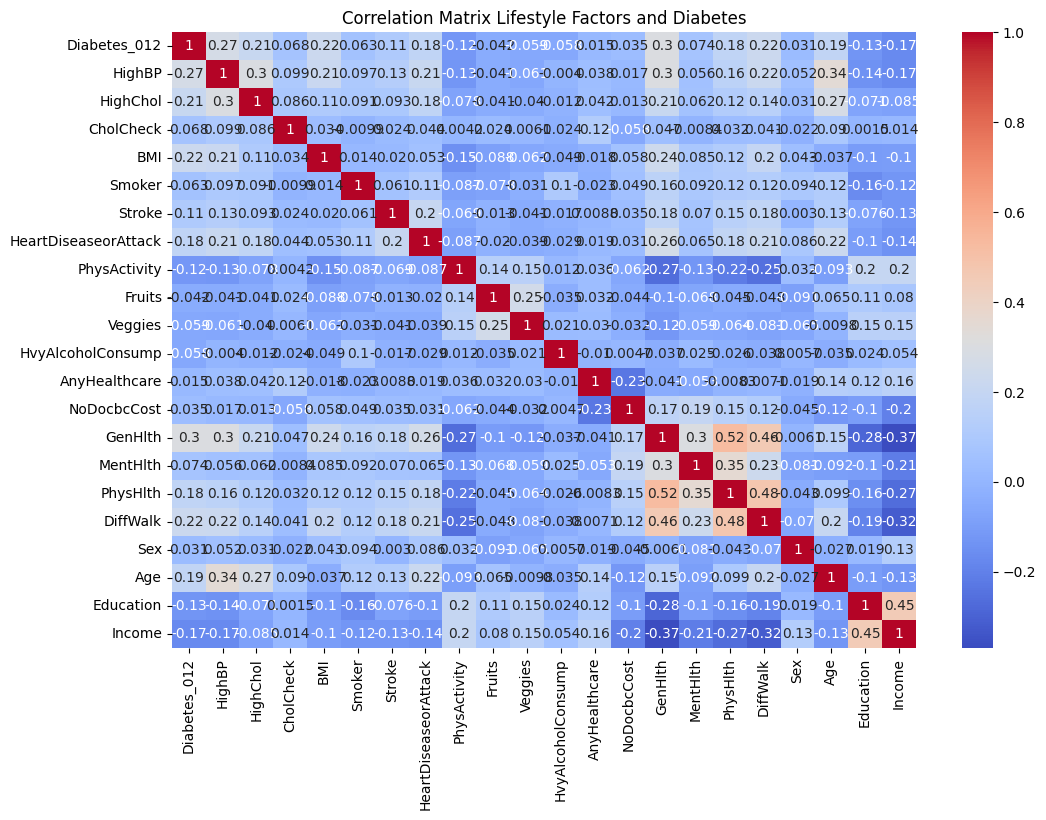

In [37]:
# Correlation between features
plt.figure(figsize=(12,8))
sns.heatmap(data_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Lifestyle Factors and Diabetes')
plt.show()

next is diabetes distribution by age

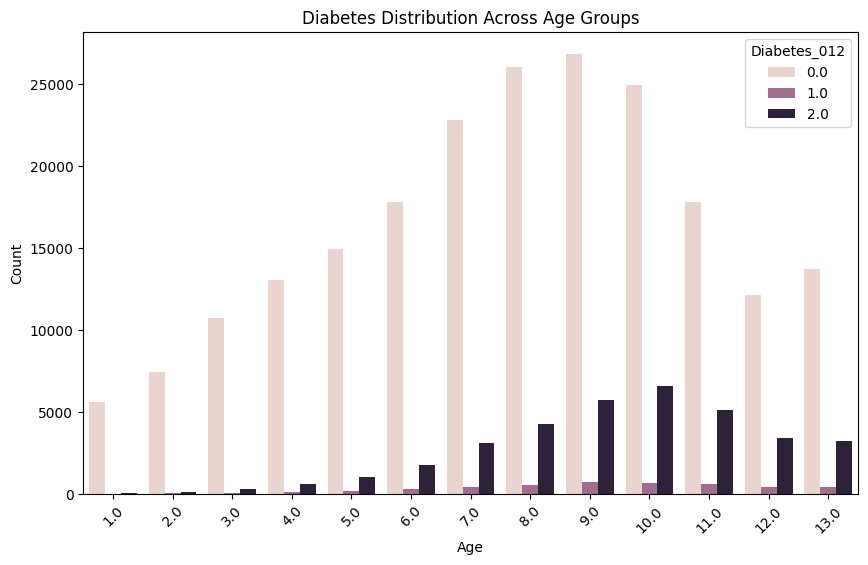

In [29]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

# Plot diabetes distribution by age
plt.figure(figsize=(10,6))
sns.countplot(x='Age', hue='Diabetes_012', data=data_df)
plt.title('Diabetes Distribution Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Then, we can see the relationship between active smokers and alcoholics and diabetes and also the relationship between BMI distribution and diabetes status.

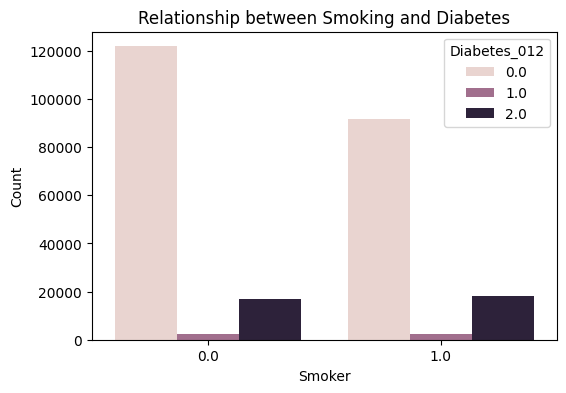

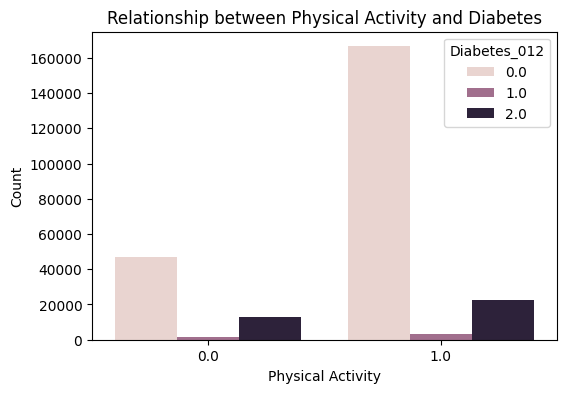

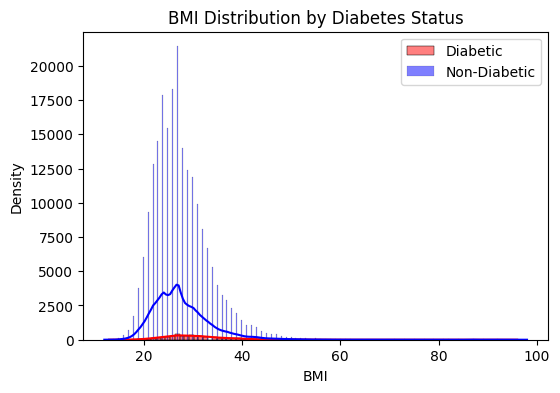

In [30]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

# Smoking and diabetes
plt.figure(figsize=(6,4))
sns.countplot(x='Smoker', hue='Diabetes_012', data=data_df)
plt.title('Relationship between Smoking and Diabetes')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

# Physical activity and diabetes
plt.figure(figsize=(6,4))
sns.countplot(x='PhysActivity', hue='Diabetes_012', data=data_df)
plt.title('Relationship between Physical Activity and Diabetes')
plt.xlabel('Physical Activity')
plt.ylabel('Count')
plt.show()

# BMI distribution
plt.figure(figsize=(6,4))
sns.histplot(data_df[data_df['Diabetes_012']==1]['BMI'], kde=True, label='Diabetic', color='red')
sns.histplot(data_df[data_df['Diabetes_012']==0]['BMI'], kde=True, label='Non-Diabetic', color='blue')
plt.title('BMI Distribution by Diabetes Status')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.legend()
plt.show()


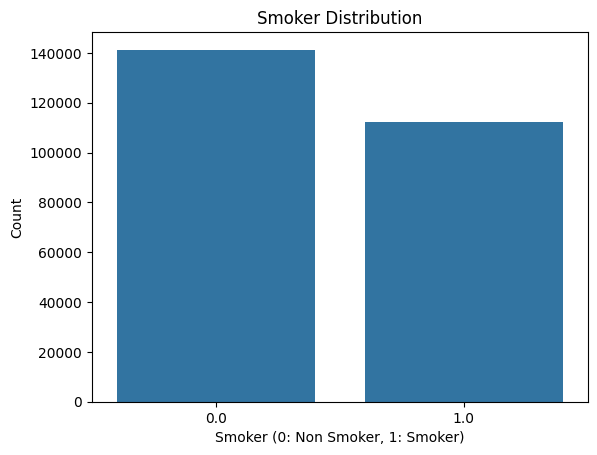

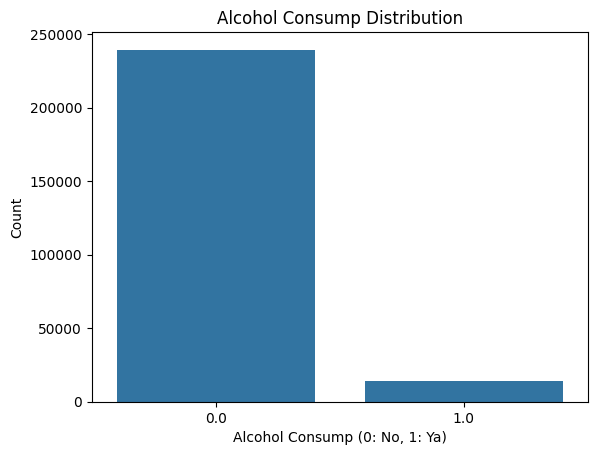

In [41]:
# Smoker Distribution
sns.countplot(x='Smoker', data=data_df)
plt.title('Smoker Distribution')
plt.xlabel('Smoker (0: Non Smoker, 1: Smoker)')
plt.ylabel('Count')
plt.show()

# Alcohol Consump Distribution
sns.countplot(x='HvyAlcoholConsump', data=data_df)
plt.title('Alcohol Consump Distribution')
plt.xlabel('Alcohol Consump (0: No, 1: Ya)')
plt.ylabel('Count')
plt.show()

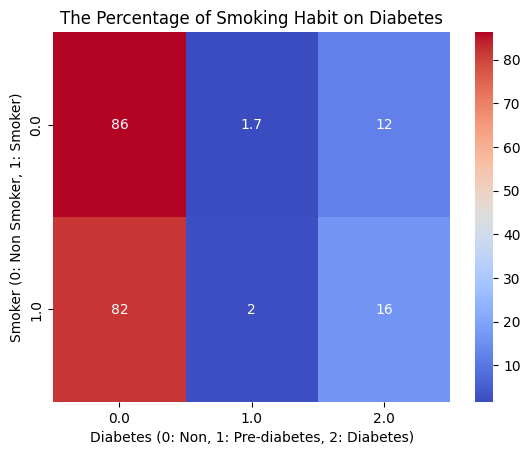

In [40]:
# Calculating the percentage of diabetes based on smoking habits
smoker_vs_diabetes = pd.crosstab(data_df['Smoker'], data_df['Diabetes_012'], normalize='index') * 100

# Visualization with heatmap
sns.heatmap(smoker_vs_diabetes, annot=True, cmap='coolwarm', cbar=True)
plt.title('The Percentage of Smoking Habit on Diabetes')
plt.xlabel('Diabetes (0: Non, 1: Pre-diabetes, 2: Diabetes)')
plt.ylabel('Smoker (0: Non Smoker, 1: Smoker)')
plt.show()


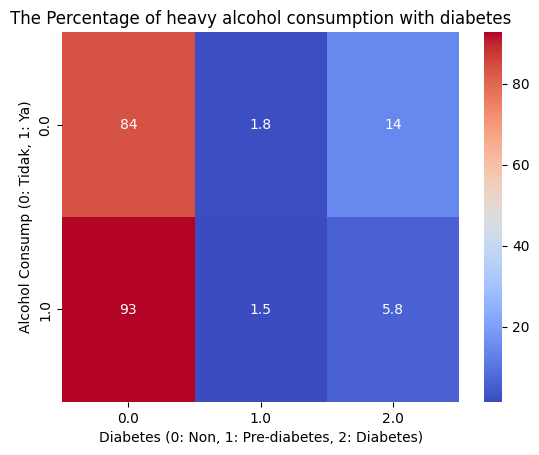

In [42]:
# Calculating the percentage of diabetes based on heavy alcohol consump
alcohol_vs_diabetes = pd.crosstab(data_df['HvyAlcoholConsump'], data_df['Diabetes_012'], normalize='index') * 100

# Visualization with heatmap
sns.heatmap(alcohol_vs_diabetes, annot=True, cmap='coolwarm', cbar=True)
plt.title('The Percentage of heavy alcohol consumption with diabetes')
plt.xlabel('Diabetes (0: Non, 1: Pre-diabetes, 2: Diabetes)')
plt.ylabel('Alcohol Consump (0: Tidak, 1: Ya)')
plt.show()


# Conclusion



1.   How do various lifestyle factors and demographic characteristics influence the likelihood of developing diabetes?



Each box in the matrix indicates the correlation value between two features.
The correlation value ranges from -1 to 1:
1: Perfect positive correlation (when one variable increases, the other also increases).
0: No correlation.
-1: Perfect negative correlation (when one variable increases, the other decreases).

The colors in the diagram help visualize the strength and direction of the correlation:
Red: Positive correlation (values close to 1).
Blue: Negative correlation (values close to -1).
White/light: Correlation close to 0, indicating no relationship.
In this result, the darker the color, the stronger the correlation.

# The Percentage of Smoking Habit Habit on Diabetes
Smoking habit (Y-axis):
0.0: No Smoking
1.0: Smoking

Diabetes status (X-axis):
0.0: No Diabetes
1.0: Pre-diabetes
2.0: Diabetes

Colors: Darker colors (dark red) indicate higher values (more people), while lighter colors (light blue) indicate lower values (fewer people).
The number inside the box: This represents the number of people in that category. Example:
The box in the first row (No Smoking) and first column (No Diabetes) has a value of 84. This means there are 84 people who do not smoke and do not have diabetes.
The box in the second row (Smoking) and second column (Pre-diabetes) has a value of 2.1, which indicates fewer people smoke and are in a pre-diabetic condition.
Conclusion:
Most people who did not smoke had non-diabetic status (value 84) compared to those with pre-diabetes or diabetes.
People who smoked were also predominantly those without diabetes (score of 81), although there was an increased risk in the pre-diabetes and diabetes groups among smokers (with scores of 2.1 and 17).
**This conclusion shows a clear association between smoking and an increased risk of diabetes.**



# The Percentage of Heavy Alcohol Consump on Diabetes
X-axis (Horizontal): Indicates the severity of diabetes.
0: No diabetes.
1: Pre-diabetes.
2: Diabetes.

Y-axis (Vertical): Indicates whether or not a person consumes heavy alcohol.
0: Does not consume heavy alcohol.
1: Consumes heavy alcohol.
Number in Box: Indicates the percentage of a group. For example, the number 84 in the top left box means that 84% of people who do not consume heavy alcohol also do not have diabetes.

General Interpretation:
Heavy Alcohol Consumption and Diabetes: This diagram shows that there is an association between heavy alcohol consumption and diabetes. The higher the alcohol consumption, the higher the likelihood of a person developing diabetes.
Most: Most people who do not consume heavy alcohol also do not have diabetes (84%).
Least: The smallest percentage was found in the group that consumed heavy alcohol but did not have diabetes (1.5%).
Preliminary Conclusion:
**From this chart, we can conclude that heavy alcohol consumption can be a risk factor for diabetes. However, keep in mind that this chart only shows correlation, not causality. This means that heavy alcohol consumption may contribute to diabetes, but there could also be other factors involved.**
